# Introduction to Pandas

## 1. Reading data

In [272]:
#From a csv file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

%matplotlib inline

df = pd.read_csv('../data-titanic/train.csv')
print(df.shape)
df.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Preprocessing

### 2.1 Data munging

#### 2.1.1 Examining de DF

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [274]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [275]:
df.duplicated().any()

False

In [276]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [277]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### 2.1.2 Visual exploration

##### Age

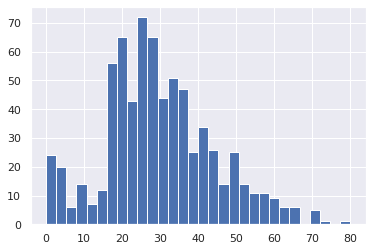

In [278]:
#Histogram of "Ages"
df['Age'].hist(bins=30, range=(0, df['Age'].max()))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c84300160>,
      dtype=object)

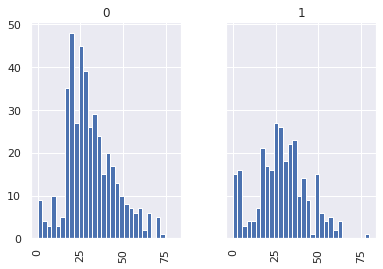

In [279]:
#Histogram of "Ages"group by "Survived"
df.hist(column='Age', by='Survived', sharey=True, bins=30,  range=(0, df['Age'].max()))

Text(0.5, 1.0, 'Passenger class per sex')

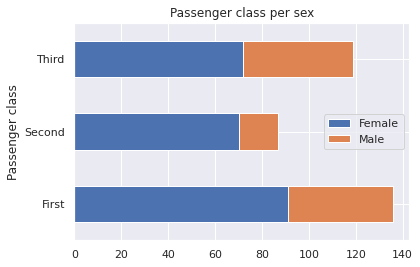

In [290]:
#Plot of "Survived" people grouped by "Sex" and "Pclass"
pclass_labels = ['First', 'Second', 'Third']
sex_labels = {'Female': 0, 'Male': 1}

plt = df.query('Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex']).plot(kind='barh',
                                                            stacked=True, rot=0, subplots=False)
plt.set_yticklabels(pclass_labels)
plt.legend(labels=sex_labels)

plt.set_ylabel('Passenger class')
plt.set_title('Passenger class per sex')#%% md

In [281]:
df_modified = df.copy()

In [282]:
df_modified.fillna(df_modified.groupby('Embarked').size().sort_values(ascending=False).index[0], inplace=True)

In [283]:
df_modified = pd.get_dummies(df, columns=['Embarked', 'Pclass'])

In [284]:
#Since the original DF is rightly skewed, we are going to fill all NaN values with the median
df_modified['Age'] = df_modified['Age'].fillna(df['Age'].median())

In [285]:
#Dropping not important columns
df_modified.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [286]:
#Enconding "Sex" feature
for sex in df_modified['Sex'].unique():
    if sex == "male":
        df_modified.loc[df_modified["Sex"] == "male", "Sex"] = 0
    else:
        df_modified.loc[df_modified["Sex"] == "female", "Sex"] = 1

In [287]:
df_modified.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,5,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [288]:
df_modified.isnull().sum()

PassengerId    0
Survived       0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64